Here the MNIST number classifier is designed and trained

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Downloading, tensorinzing and normalizing MNSIT dataset. Split into train and test.

In [10]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

Overview over train- and test-dataset.

In [11]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ))

Function to show a various amout of images out of the train dataset.

In [12]:
def show_train_imgs(n=8, m=5):
  for i in range(m):
    for j in range(n):
      idx = np.random.randint(len(train_dataset.train_labels))
      plt.subplot(int('1' + str(n) + str(j+1)))
      plt.imshow(train_dataset.data[idx], cmap='gray')
      plt.title(train_dataset.train_labels[idx].item(), fontsize=30)
      plt.axis('off')

    plt.show()

Executing function to show sample images.

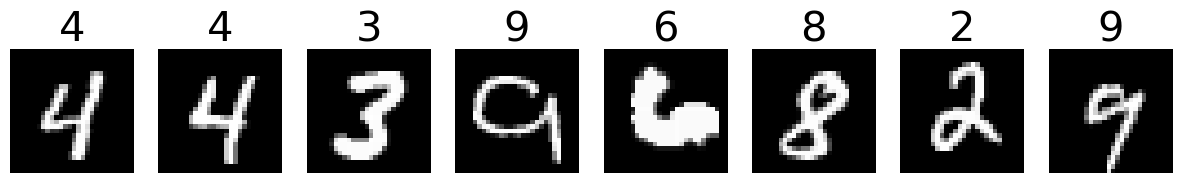

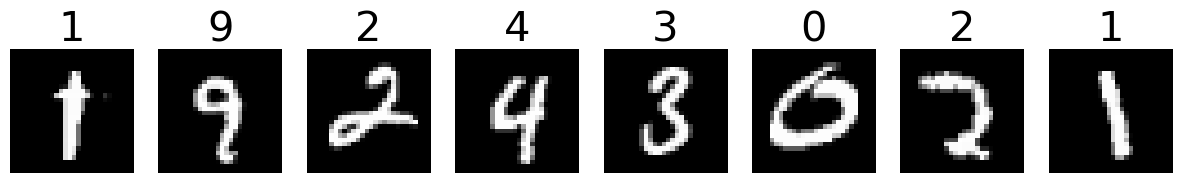

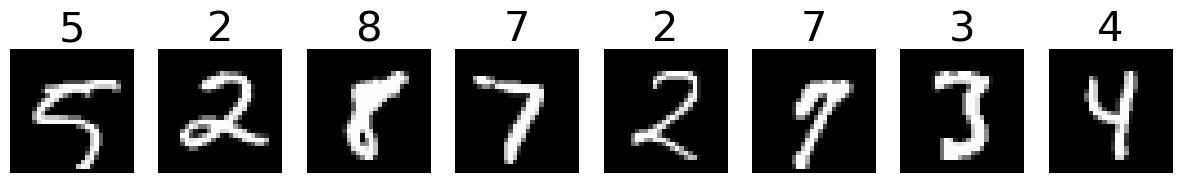

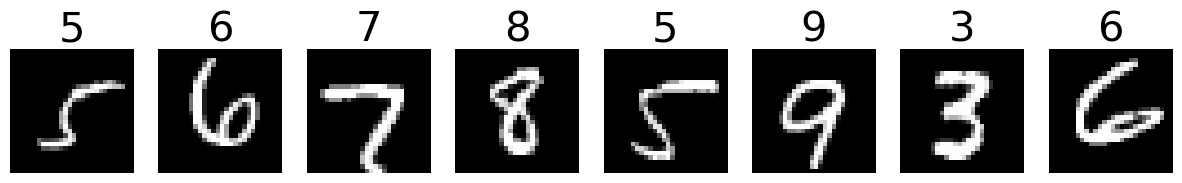

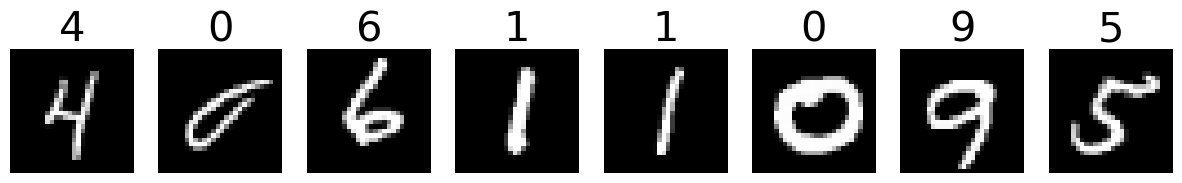

In [13]:
plt.rcParams['figure.figsize'] = (15, 5)
show_train_imgs(n=8, m=5)

Creating train- and test-loader to use them in training later, with batchsize 64.

In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Design of the neural net. Combination of Linear Layers and ReLU activation funcitons. Before feeding through the layers, the input is flattened to be able to feed it into the first linear layer. Like that additional (unnecessary) dimensions are erased.

In [15]:
class MnistClassifier(nn.Module):
  def __init__(self):
    super(MnistClassifier, self).__init__()
    self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
    self.layer1 = nn.Linear(784, 512)
    self.act1 = nn.ReLU()
    self.layer2 = nn.Linear(512, 256)
    self.act2 = nn.ReLU()
    self.layer3 = nn.Linear(256, 128)
    self.act3 = nn.ReLU()
    self.layer4 = nn.Linear(128, 64)
    self.act4 = nn.ReLU()
    self.layer5 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = self.layer1(x)
    x = self.act1(x)
    x = self.layer2(x)
    x = self.act2(x)
    x = self.layer3(x)
    x = self.act3(x)
    x = self.layer4(x)
    x = self.act4(x)
    x = self.layer5(x)
    return x

Creating a neural net.

In [ ]:
model = MnistClassifier()

Function for calculating accuracies with different loaders (train and test).

In [16]:
def get_accuracy(loader):
  model.eval()

  correct_predictions = 0
  total_examples = 0

  # iterate over the DataLoader
  with torch.no_grad():  # turn off gradient calculation for inference
    for inputs, labels in loader:
      inputs = inputs.view(inputs.shape[0], -1)
      outputs = model(inputs)

      _, predicted = torch.max(outputs, 1)

      correct_predictions += (predicted == labels).sum().item()
      total_examples += labels.size(0)  # Batch size

  # calculate accuracy
  accuracy = correct_predictions / total_examples
  model.train()
  return accuracy

Actual training.

In [31]:
epochs = 20
losses_training, accuracy_traindata, accuracy_testdata = [], [], []
criterion = nn.CrossEntropyLoss()

model.train()

for epoch in range(epochs):
  optimizer = optim.SGD(model.parameters(), lr=0.01)

  for input, labels in train_loader:
    optimizer.zero_grad()

    images = input.view(input.shape[0], -1) # input had shape: [64, 1, 28, 28], images shape now: [64, 784]
    results = model(images)

    loss = criterion(results, labels)
    losses_training.append(loss.item())
    loss.backward()

    optimizer.step()

  print(f"Epoch {epoch+1}: {loss}")

  train_acc = get_accuracy(train_loader)
  test_acc = get_accuracy(test_loader)
  accuracy_traindata.append(train_acc)
  accuracy_testdata.append(test_acc)
  print(f"Accs: Tr: {train_acc} , Te: {test_acc}")

Epoch 1: 1.2152950763702393
Accs: Tr: 0.7006833333333333 , Te: 0.7018
Epoch 2: 0.3191083073616028
Accs: Tr: 0.8697666666666667 , Te: 0.8744
Epoch 3: 0.3744109570980072
Accs: Tr: 0.88595 , Te: 0.8887
Epoch 4: 0.49205857515335083
Accs: Tr: 0.90395 , Te: 0.9073
Epoch 5: 0.16538764536380768
Accs: Tr: 0.9261166666666667 , Te: 0.9241
Epoch 6: 0.1658686101436615
Accs: Tr: 0.9415833333333333 , Te: 0.9399
Epoch 7: 0.09520434588193893
Accs: Tr: 0.9537333333333333 , Te: 0.951
Epoch 8: 0.15100789070129395
Accs: Tr: 0.9565666666666667 , Te: 0.9516
Epoch 9: 0.47885212302207947
Accs: Tr: 0.8929 , Te: 0.8947
Epoch 10: 0.11024429649114609
Accs: Tr: 0.9648333333333333 , Te: 0.9588
Epoch 11: 0.2132454663515091
Accs: Tr: 0.9686666666666667 , Te: 0.9596
Epoch 12: 0.570472776889801
Accs: Tr: 0.9595 , Te: 0.9527
Epoch 13: 0.014227121137082577
Accs: Tr: 0.9730666666666666 , Te: 0.9638
Epoch 14: 0.02078164555132389
Accs: Tr: 0.9770666666666666 , Te: 0.9652
Epoch 15: 0.21642029285430908
Accs: Tr: 0.974533333333

Plotting the losses for each image fed into the neural net.

In [35]:
len(losses_training)

18760

60000 train images / 64 batchsize * 20 epochs = len(losses_training)

Text(0, 0.5, 'Cross Entropy Loss')

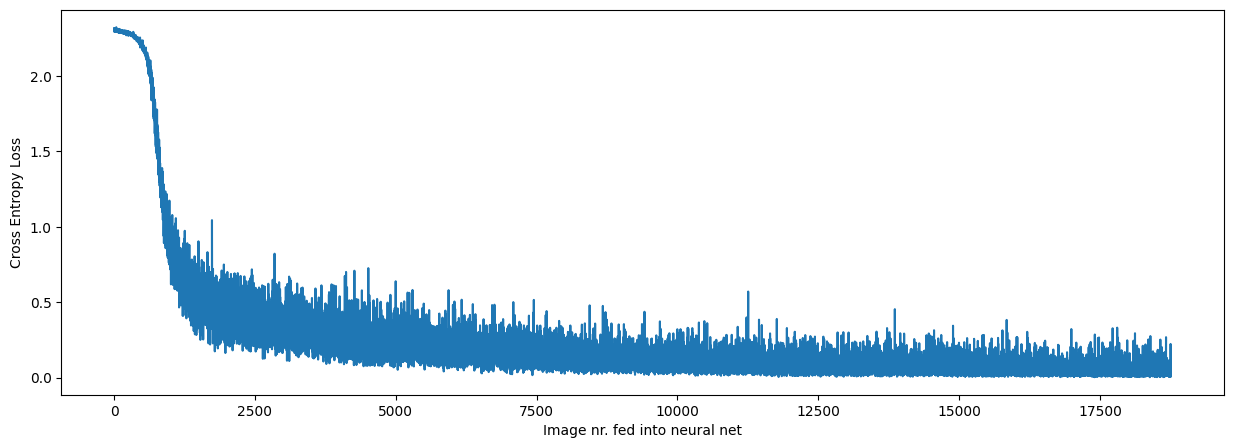

In [36]:
plt.plot(losses_training)
plt.xlabel("Image nr. fed into neural net")
plt.ylabel("Cross Entropy Loss")

Plotting of training and test accuracy.

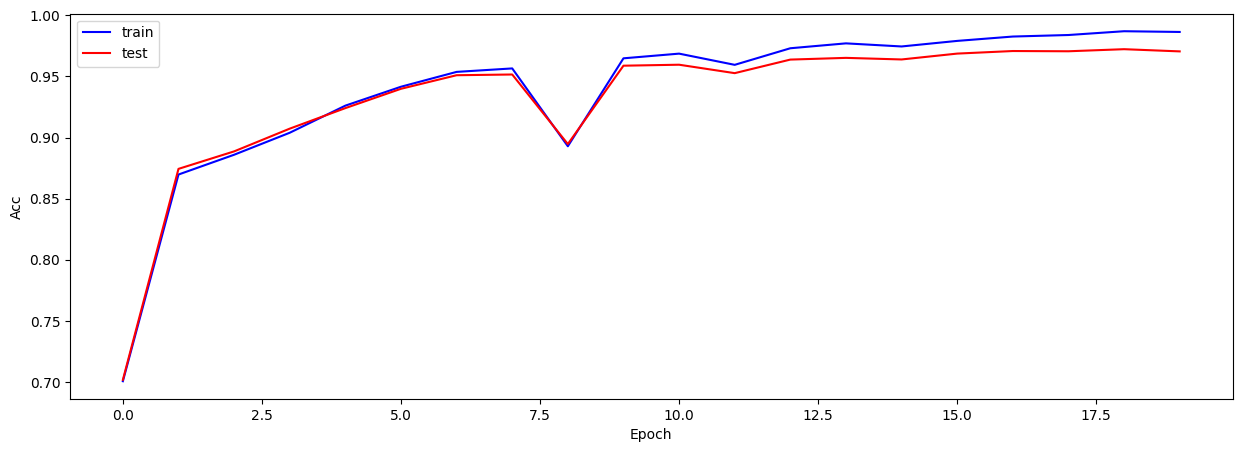

In [38]:
plt.plot(accuracy_traindata, color='b', label="train")
plt.plot(accuracy_testdata, color='r', label="test")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()

Saving the current model to Google Drive

In [21]:
model_save_name = 'mnist_model_97.pt'
path = f"{model_save_name}"
torch.save(model.state_dict(), path)

Retrieving model from drive.

In [22]:
model = MnistClassifier()
model_save_name = 'mnist_model_97.pt'
path = f"{model_save_name}"
model.load_state_dict(torch.load(path))

<All keys matched successfully>

Getting accuracy for testing model. To make model work as before, a model as MnistClassifier has to be created, with *load_state_dict()* the params are loaded and attached to the neural net.

In [23]:
acc = get_accuracy(test_loader)
acc

0.9758